<a href="https://colab.research.google.com/github/PhanDinhPhong/BTVN3/blob/main/cuoiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import tensorflow as tf
import keras
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/AI')

In [ ]:
# load image
path_dir = os.path.join(os.getcwd(),'dulieu_xe')
path_dir = sorted(glob.glob(path_dir + '/*'))

Honda_air_blade = glob.glob(path_dir[0] + '/*')
Honda_future = glob.glob(path_dir[1] + '/*')
Honda_lead = glob.glob(path_dir[2] + '/*')
Honda_msx = glob.glob(path_dir[3] + '/*')
Honda_sh_mode = glob.glob(path_dir[4] + '/*')
Honda_vision = glob.glob(path_dir[5] + '/*')
Honda_wave_anpha = glob.glob(path_dir[6] + '/*')
Honda_winner = glob.glob(path_dir[7] + '/*')
Yamaha_exciter = glob.glob(path_dir[8] + '/*')
Yamaha_sirius = glob.glob(path_dir[9] + '/*')

img_cnt = len(Honda_air_blade) + len(Honda_future) + len(Honda_lead) + len(Honda_msx) + len(Honda_sh_mode) + len(Honda_vision) + len(Honda_wave_anpha) + len(Honda_winner) + len(Yamaha_exciter) + len(Yamaha_sirius)

print(img_cnt)

class_names = ['Honda_air_blade', 'Honda_future', 'Honda_lead', 'Honda_msx','Honda_sh_mode','Honda_vision','Honda_wave_anpha','Honda_winner','Yamaha_exciter','Yamaha_sirius']
num_classes = len(class_names)

print(class_names)

200
['Honda_air_blade', 'Honda_future', 'Honda_lead', 'Honda_msx', 'Honda_sh_mode', 'Honda_vision', 'Honda_wave_anpha', 'Honda_winner', 'Yamaha_exciter', 'Yamaha_sirius']


In [ ]:
def load_image(path, img_size = (150, 150)):
    img = cv2.imread(path, 1)
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def load_images(path_dir):
    images = []
    labels = []
    path_dir = sorted(glob.glob(path_dir + '/*'))
    print(path_dir)
    for paths in path_dir:
        paths = sorted(glob.glob(paths + '/*'))
        for path in paths:
            img = load_image(path)
            images.append(img)
            labels.append(class_names.index(os.path.basename(os.path.dirname(path))))
    return np.array(images), np.array(labels)

In [ ]:
data_dir = os.path.join(os.getcwd(), 'dulieu_xe')
dataset = load_images(data_dir)

['/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Honda_air_blade', '/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Honda_future', '/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Honda_lead', '/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Honda_msx', '/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Honda_sh_mode', '/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Honda_vision', '/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Honda_wave_anpha', '/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Honda_winner', '/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Yamaha_exciter', '/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Yamaha_sirius']


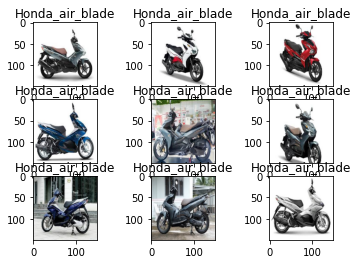

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.title(class_names[dataset[1][i]])
  plt.imshow(dataset[0][i])

In [ ]:
print(dataset[0].shape)
print(dataset[1].shape)

train_images, test_images, train_labels, test_labels = train_test_split(dataset[0], dataset[1], test_size = 0.05, random_state = 42)

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_labels = keras.utils.np_utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.np_utils.to_categorical(test_labels, num_classes)

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(200, 150, 150, 3)
(200,)
(190, 150, 150, 3)
(10, 150, 150, 3)
(190, 10)
(10, 10)


In [ ]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 41, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(256, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(256, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

opt=SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size = 1, epochs = 100, verbose = 1)
model.save('classification_motorcycle')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        36928     
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
190/190 [==============================] - 13s 8ms/step - loss: nan - accuracy: 0.1000
Epoch 2/100
190/190 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.1000
Epoch 3/100
190/190 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.1000
Epoch 4/100
190/190 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.1000
Epoch 5/100
190/190 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.1000
Epoch 6/100
190/190 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.1000
Epoch 7/100
190/190 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.1000
Epoch 8/100
190/190 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.1000
Epoch 9/100
190/190 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.1000
Epoch 10/100
190/190 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.1000
Epoch 11/100
190/1

Text(0.5, 1.0, 'Dự đoán: Honda_air_blade')

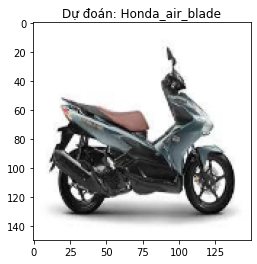

In [ ]:
img_test = load_image('/content/gdrive/MyDrive/Colab Notebooks/AI/dulieu_xe/Honda_air_blade/Honda_air_blade1.jpg')
plt.imshow(img_test)

img_test = np.asarray(img_test)

img_test = img_test/255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Dự đoán: {}".format(class_names[classe_num]))

In [ ]:
#Saving the  model 
fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("fer.h5")  

In [ ]:
model.save("project.hdf5")
model.save("project.h5")

# Link bộ dữ liệu:
https://drive.google.com/drive/folders/1YS3QwO7XgzlwsJX9it8ST8nDIRxmaxdY?usp=sharing